In [ ]:
import numpy as np
import pandas as pd 
import re # 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from joblib import dump, load
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
#from sklearn.model_selection import knn
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.datasets import make_classification

In [ ]:
!pip install scikit-learn==0.23.2

In [ ]:
sklearn.__version__

'0.23.2'

In [ ]:
df_texte=pd.read_csv('/content/sample_data/comments_train (1).csv')

In [ ]:
!pip install stopwords

In [ ]:
!pip install  nltk

In [ ]:
!pip install Unidecode


In [ ]:
df_texte.head(10)

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
5,Déjeuner hier avec une copine. Impossible de r...,Positive
6,Visite dimanche midi accueil super conviviale ...,Positive
7,Ce restaurant devrait servir d’exemple dans le...,Positive
8,Oxte sert une cuisine originale et élaborée. M...,Negative
9,On voulait réserver donc comme tout le monde o...,Negative


In [ ]:
df_texte.shape

(1617, 2)

In [ ]:
!pip install joblib

In [ ]:
load("/content/sample_data/sentiment_pipe.joblib")

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])

In [ ]:
old_pipe=load("/content/sample_data/sentiment_pipe.joblib")

In [ ]:
from sklearn.svm import SVC
old_pipe.predict(df_texte.comment)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_texte['comment'])
print(vectorizer.get_feature_names())
print(X.shape)

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder
comment = df_texte["sentiment"]
le = LabelEncoder()
le.fit(comment)
list(le.classes_)
df_texte['sentiment']=le.transform(df_texte['sentiment'])
df_texte['sentiment']

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
y=df_texte['sentiment']
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
pip = load('/content/sample_data/sentiment_pipe.joblib')
pip

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])

In [ ]:
pip.predict(df_texte.comment)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
y_pred=pip.predict(df_texte.comment)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
import unidecode
import re
def nettoyage(texte):
    tex=[]
    s_w=list((stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']
    s_w=[unidecode.unidecode(elem.lower()) for elem in s_w]
    # mettre en minuscule
    texte=texte.lower()
    # enlever les accents
    texte=unidecode.unidecode(texte).replace("'"," ")
    # enlever les chiffres et caracteres spéciaux
    pattern="([a-z]+)"
    for elem in re.findall(pattern,texte):
        # enlever les stop words
        if elem in s_w:
            continue
        else:
            tex.append(elem)
    return ' '.join(tex)

In [ ]:
load('/content/sample_data/sentiment_pipe.joblib')

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', SVC(C=1000, gamma=0.001))])

In [ ]:
y_pred2 = pip.decision_function(X_test)
y_pred2

NameError: ignored

In [ ]:
pip = load('/content/sample_data/sentiment_pipe.joblib')
pip.predict(df_texte.comment)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
comment = df_texte["sentiment"]
le = LabelEncoder()
le.fit(comment)
list(le.classes_)
df_texte['sentiment']=le.transform(df_texte['sentiment'])
df_texte['sentiment']

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
df_texte['sentiment'].value_counts()

1    1019
0     598
Name: sentiment, dtype: int64

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
X=df_texte['comment']
y=df_texte['sentiment']
y_pred=pip.predict(X)
print("AUC :",roc_auc_score(y_pred,y))
print('accuracy',':',metrics.accuracy_score(y, y_pred))
print('precision',':',metrics.precision_score(y, y_pred))
print('recall',':',metrics.recall_score(y, y_pred))
print('f1 score',':',metrics.f1_score(y, y_pred))

AUC : 0.7220142706749327
accuracy : 0.6957328385899815
precision : 0.6867469879518072
recall : 0.9509322865554465
f1 score : 0.7975308641975308


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
pip.fit(X_train,y_train)
y_pred1 = pip.predict(X_test)
y_pred2 = pip.decision_function(X_test)
print('AUC :',roc_auc_score(y_test,y_pred2))
print('accuracy',':',metrics.accuracy_score(y_test,y_pred1))
print('precision',':',metrics.precision_score(y_test,y_pred1))
print('recall',':',metrics.recall_score(y_test,y_pred1))
print('f1 score',':',metrics.f1_score(y_test,y_pred1))

AUC : 0.9279046880591674
accuracy : 0.8539325842696629
precision : 0.8547486033519553
recall : 0.9216867469879518
f1 score : 0.8869565217391305


In [ ]:
X=df_texte['comment']
X

0       J'ai réservé ma table quelques mois à l'avance...
1       Que dire... Nicolas sale est un chef d excepti...
2       Dans une rue tranquille non loin du Panthéon u...
3       Rien à redire le restaurant est irréprochablem...
4       Comme avec les autres commentaires nos repas é...
                              ...                        
1612    Le service a été rapide et les crêpes très bon...
1613    Restaurant excellent bon rapport qualité-prix ...
1614    Incroyable mais vrai 190€ la baguette ! Que di...
1615    Un japonais assez chic des beaux quartiers. No...
1616    Accueil très chaleureux avec un personnel jeun...
Name: comment, Length: 1617, dtype: object

In [ ]:
df_texte['comment'] = df_texte['comment'].str.lower()
df_texte

,comment,sentiment
0,j'ai réservé ma table quelques mois à l'avance...,1
1,que dire... nicolas sale est un chef d excepti...,1
2,dans une rue tranquille non loin du panthéon u...,1
3,rien à redire le restaurant est irréprochablem...,1
4,comme avec les autres commentaires nos repas é...,1
...,...,...
1612,le service a été rapide et les crêpes très bon...,1
1613,restaurant excellent bon rapport qualité-prix ...,1
1614,incroyable mais vrai 190€ la baguette ! que di...,0
1615,un japonais assez chic des beaux quartiers. no...,1


In [ ]:
y=df_texte['sentiment']
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train

377     un grand bravo à toute l'équipe ! je n'ai jama...
836     excellent dîner saveurs recherchées et agréabl...
126     nombreuses mises en bouche plus belles et plus...
1231    arrivé la journée même  application the fork p...
1509    petite salle musique sympa. un service sans pl...
                              ...                        
1130    nous étions venu au kgb il y a quelques années...
1294    je suis furieux de cette soirée absolument gâc...
860     ce fut un merveilleux moment une grande découv...
1459    très bon brunch à 42€ / personne. les plats so...
1126    c étais un très bon restaurant ou je suis venu...
Name: comment, Length: 1083, dtype: object

In [ ]:
X_test

135     les galettes n'ont rien de fantastiques les pr...
478     c'est bon mais très gras et les serveurs sembl...
1193    les plats ont vraiment recherché c'est tres ag...
566     oui je confirme tout les excellents commentair...
626     excellente pizzas pâte parfaite garniture d un...
                              ...                        
296     nous avions privatisé le restaurant cezembre p...
602     après avoir laissé de nombreux commentaires su...
461     un décor très ancien avec du tissu mural taché...
1054    petit bistro divin! prendre le menu évasion de...
798     après un court spectacle un excellent diner br...
Name: comment, Length: 534, dtype: object

In [ ]:
y_train

377     1
836     1
126     1
1231    1
1509    0
       ..
1130    0
1294    0
860     1
1459    1
1126    0
Name: sentiment, Length: 1083, dtype: int64

In [ ]:
y_test

135     0
478     0
1193    1
566     1
626     1
       ..
296     1
602     0
461     0
1054    1
798     1
Name: sentiment, Length: 534, dtype: int64

In [ ]:
y=df_texte['sentiment']
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
Ypred= pip

In [ ]:
from sklearn.model_selection import GridSearchCV

param_svc={
    'clf__kernel': ['rbf'],
    'clf__C': [1000],
    'clf__gamma': [0.001],
    'clf__random_state': [None]}
clf=GridSearchCV(pip,param_svc,n_jobs=1,verbose=3)
clf.fit(X_train,y_train)
print(clf.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None, score=0.825, total=   0.4s
[CV] clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None, score=0.857, total=   0.4s
[CV] clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV]  clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None, score=0.871, total=   0.4s
[CV] clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None 
[CV]  clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None, score=0.847, total=   0.4s
[CV] clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None 
[CV]  clf__C=1000, clf__gamma=0.001, clf__kernel=rbf, clf__random_state=None, score=0.898, total=   0.4s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.9s finished


{'clf__C': 1000, 'clf__gamma': 0.001, 'clf__kernel': 'rbf', 'clf__random_state': None}


In [ ]:
y_pred1=pip.predict(X_test)
y_pred2=clf.decision_function(X_test)

In [ ]:
#print(gscv.best_params_)

In [ ]:
from sklearn.naive_bayes import GaussianNB
param_grid = {'var_smoothing': np.logspace(0,-9, num=4)}
param_grid
#2 fit
gscv = GridSearchCV(
    GaussianNB(),
    param_grid,
    cv = 3)

In [ ]:
gscv

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e+00, 1.e-03, 1.e-06, 1.e-09])})

In [ ]:
y=df_texte['sentiment']
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1617, dtype: int64

In [ ]:
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1,stratify=y)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
param_grid = {'alpha': np.linspace(0.25,1, num=4)}
param_grid
#2 fit
gscv = GridSearchCV(
    MultinomialNB(),
    param_grid,
    cv = 3)
gscv

GridSearchCV(cv=3, estimator=MultinomialNB(),
             param_grid={'alpha': array([0.25, 0.5 , 0.75, 1.  ])})

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
cv_method = KFold(n_splits=4, shuffle=True)
model = MLPClassifier()

In [ ]:
tuned_params = [{'solver': ['sgd'], 'learning_rate': ['constant'], "learning_rate_init" : [0.001, 0.01, 0.05, 0.1]},
                {"learning_rate_init" : [0.001, 0.01, 0.05, 0.1]}]

In [ ]:
cv_method = KFold(n_splits=4, shuffle=True)
model = MLPClassifier()

In [ ]:
y_test

1039    1
1523    0
223     1
1438    0
1000    0
       ..
348     0
309     1
680     0
839     1
226     1
Name: sentiment, Length: 486, dtype: int64

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
 #print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print('accuracy joblib = 0.6957')

accuracy joblib = 0.6957


In [ ]:
import pandas as pd
df_texte=pd.read_csv('/content/sample_data/comments_train (1).csv')
df_texte

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,Positive
1,Que dire... Nicolas sale est un chef d excepti...,Positive
2,Dans une rue tranquille non loin du Panthéon u...,Positive
3,Rien à redire le restaurant est irréprochablem...,Positive
4,Comme avec les autres commentaires nos repas é...,Positive
...,...,...
1612,Le service a été rapide et les crêpes très bon...,Positive
1613,Restaurant excellent bon rapport qualité-prix ...,Positive
1614,Incroyable mais vrai 190€ la baguette ! Que di...,Negative
1615,Un japonais assez chic des beaux quartiers. No...,Positive


In [ ]:
import unidecode
import re
def nettoyage(texte):
    tex=[]
    s_w=list((stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']
    s_w=[unidecode.unidecode(elem.lower()) for elem in s_w]
    # mettre en minuscule
    texte=texte.lower()
    # enlever les accents
    texte=unidecode.unidecode(texte).replace("'"," ")
    # enlever les chiffres et caracteres spéciaux
    pattern="([a-z]+)"
    for elem in re.findall(pattern,texte):
        # enlever les stop words
        if elem in s_w:
            continue
        else:
            tex.append(elem)
    return ' '.join(tex)

In [ ]:
# Enlever les lignes identiques
print(len(df_texte))
df_texte.drop_duplicates('comment',inplace=True)
print(len(df_texte))

1617
1534


In [ ]:
!pip install  nltk

In [ ]:
!pip install unidecode

In [ ]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-cp37-none-any.whl size=32913 sha256=db25349029c1b61a3f46f235836afc1248aff9fe4cd7541975ba0c4356c942ca
  Stored in directory: /root/.cache/pip/wheels/75/37/6a/2b295e03bd07290f0da95c3adb9a74ba95fbc333aa8b0c7c78
Successfully built stop-words


In [ ]:
#NETTOYAGE DONNÉES
from unidecode import unidecode
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('french')
def nettoyage(texte):
    tex=[]
    s_w=list(set(stopwords.words('french')+stop_words.get_stop_words('fr')))+['plus']
    s_w=[unidecode(elem.lower()) for elem in s_w]
    # mettre en minuscule
    texte=texte.lower()
    # enlever les accents
    texte=unidecode(texte).replace("'"," ")
    
    # Lematize/Stem
    
    # enlever les chiffres et caracteres spéciaux
    pattern="([a-z]+)"
    
    for elem in re.findall(pattern,texte):
        # enlever les stop words
        if elem in s_w:
            continue
        else:
            tex.append(elem)
    return ' '.join(tex)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#df_texte['comment'] = df_texte['comment'].apply(nettoyage)
#df_texte.head()

In [ ]:
comment = df_texte["sentiment"]
le = LabelEncoder()
le.fit(comment)
list(le.classes_)
df_texte['sentiment']=le.transform(df_texte['sentiment'])
df_texte

,comment,sentiment
0,J'ai réservé ma table quelques mois à l'avance...,1
1,Que dire... Nicolas sale est un chef d excepti...,1
2,Dans une rue tranquille non loin du Panthéon u...,1
3,Rien à redire le restaurant est irréprochablem...,1
4,Comme avec les autres commentaires nos repas é...,1
...,...,...
1612,Le service a été rapide et les crêpes très bon...,1
1613,Restaurant excellent bon rapport qualité-prix ...,1
1614,Incroyable mais vrai 190€ la baguette ! Que di...,0
1615,Un japonais assez chic des beaux quartiers. No...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_texte['comment'])
print(vectorizer.get_feature_names(),len(vectorizer.get_feature_names()))
print(X.toarray())

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
Y = tfidf_vec.fit_transform(df_texte['comment'])
print(tfidf_vec.get_feature_names())
print(Y.toarray())

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
print(X.toarray().mean())
print(Y.toarray().mean())

0.005917222435298266
0.0008102612107355774


In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def Word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize(i) for i in text]
    return lem_text

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_texte['comment'])
print(vectorizer.get_feature_names())
print(X.shape)

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y=df_texte['sentiment']

In [ ]:
X

<1534x6401 sparse matrix of type '<class 'numpy.float64'>'
	with 50247 stored elements in Compressed Sparse Row format>

In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1612    1
1613    1
1614    0
1615    1
1616    1
Name: sentiment, Length: 1534, dtype: int64

In [ ]:
y_pred1

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

<1227x6401 sparse matrix of type '<class 'numpy.float64'>'
	with 40387 stored elements in Compressed Sparse Row format>

In [ ]:
pipeline = Pipeline([
  ('tfidf', TfidfVectorizer()),
  ('rfc', RandomForestClassifier())
  ])

from sklearn import metrics
pipeline.fit(list(X_train), list(y_train))
predicted = pipeline.predict(list(X_test))
print(metrics.classification_report(list(y_test), predicted))

joblib.dump(pipeline, 'pipeline_rfc.joblib')

parameters = {'tfidf__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'tfidf__max_df': [0.25, 0.5, 0.75, 1.0],
              'tfidf__max_features': [10, 50, 100, 250, 500, 1000, None],
              'tfidf__smooth_idf': (True, False),
              'tfidf__norm': ('l1', 'l2', None),
              }

grid = GridSearchCV(pipeline, parameters, cv=2, verbose=1)
grid.fit(X, y)
print(pipeline)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_texte['comment'])
print(vectorizer.get_feature_names(),len(vectorizer.get_feature_names()))

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN 
ngh = KNN(n_neighbors=3)
Kb = ngh.fit(X_train,y_train)
print(ngh.classes_,'\n',ngh.effective_metric_,ngh.effective_metric_params_,ngh.outputs_2d_)

[0 1] 
 euclidean {} False


In [ ]:

Ypred=Kb.predict(X_test)
Ypred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import GridSearchCV as GCV
acc(y_test,Ypred)

0.6844181459566075

In [ ]:
dump(model,'my_pipeline.pkl')

['my_pipeline.pkl']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
knn = KNN(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))
# accuracy

Prediction: [1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 0 0 0 1 1 1 1 1 1]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_texte['comment'])
print(vectorizer.get_feature_names(),len(vectorizer.get_feature_names()))

print(X.toarray())

['00', '00h', '01', '03', '06', '08', '10', '100', '1000', '100000', '100g', '109', '11', '110', '114', '11h45', '12', '12460', '12e', '12h25', '13', '13eme', '13h', '13h30', '14', '145', '14h', '14h30', '15', '150', '15h', '15j', '15km', '16', '165', '16em', '17', '170', '172', '179', '17h40', '18', '185', '1880', '19', '190', '1900', '1920', '195', '19eme', '19h', '19h30', '1bol', '1er', '1ere', '1h', '1h30', '1h45', '1minutes', '20', '200', '2001', '2002', '2006', '2009', '200euros', '2011', '2012', '2014', '2015', '2016', '2017', '2018', '20h', '20h00', '20h30', '21', '2190', '21h30', '21h50', '22', '220', '222g', '22h', '22h00', '22h15', '22h25', '22h30', '23', '23h', '23h30', '24', '25', '26', '27', '27ème', '28', '280', '29', '2e', '2eme', '2emefois', '2emme', '2h30', '30', '300g', '30min', '30ème', '31', '310', '33', '330', '34', '35', '350', '36', '38', '39', '39v', '3cl', '3cm', '3e', '3h', '3h30', '3heures', '3légumes', '3ème', '40', '400', '42', '43', '45', '450', '48', '49

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#instanciation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
DTC.fit(X_train,y_train)
DTC

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

In [ ]:
y_pred = DTC.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_tree = confusion_matrix(y_test,y_pred)
cm_tree

array([[ 48,  53],
       [ 42, 164]])

In [ ]:
print(y_pred,'\n',type(y_pred))

[1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1
 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1
 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0
 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 0 0 1 0] 
 <class 'numpy.ndarray'>


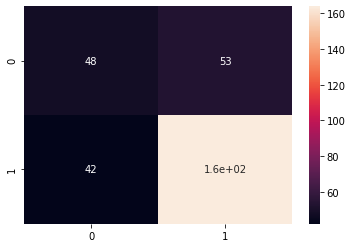

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

In [ ]:
y_pred=DTC.predict(X_test)
print(y_pred[1])
#Accuracy /total, précision /colonnes, AUC aire sous la courbe

1


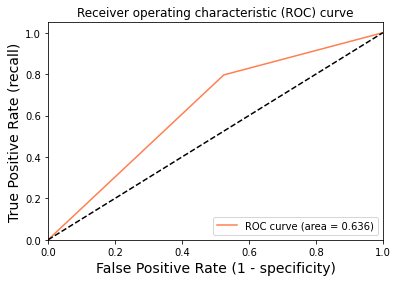

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = DTC.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

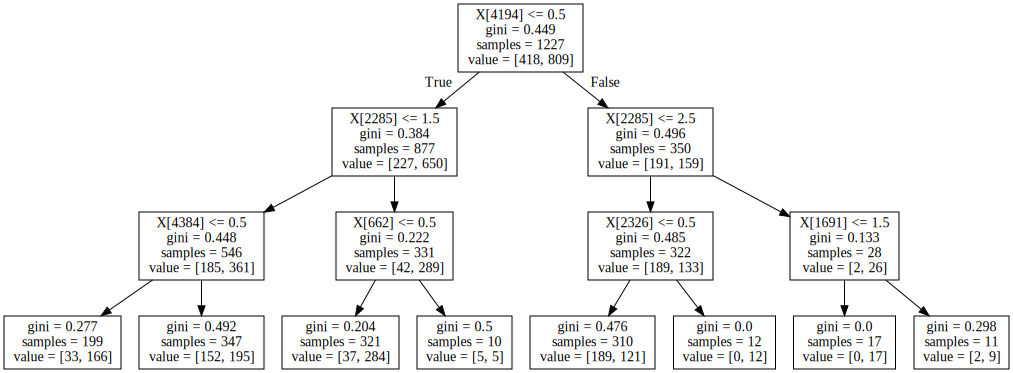

In [ ]:
from sklearn import tree
import graphviz 
from IPython.display import display
display(graphviz.Source(tree.export_graphviz(DTC)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#print(RandomForestClassifier.__doc__)

In [ ]:
RFC = RandomForestClassifier(n_estimators=1000)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [ ]:
pred=RFC.predict(X_test)
print(pred[1])

1


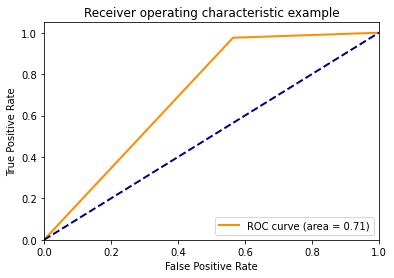

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
fpr2, tpr2, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr2, tpr2)

plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,3]
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

print(CV_rfc.best_params_)

{'max_depth': 2, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 500, max_depth=3)
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))
#0.7480314960629921

Accuracy for Random Forest on CV data:  0.6710097719869706


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
sel = SelectFromModel(ExtraTreesClassifier(n_estimators=10, random_state=444), 
                      threshold='mean')
clf = RandomForestClassifier(n_estimators=5000, random_state=444)
model = Pipeline([('sel', sel), ('clf', clf)])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}
gs = GridSearchCV(model, params)
gs.fit(x_train, y_train)
print('accuracy :',gs.score(x_test, y_test))

accuracy : 0.7744034707158352


In [ ]:
dump(model,'my_pipeline2.joblib')

['my_pipeline2.joblib']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.3,random_state = 1)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
#print('Prediction: {}'.format(prediction))
print('With KNN (K=3) accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN (K=3) accuracy is:  0.7071583514099783


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print('With RFC accuracy is: ',clf.score(X_test,y_test)) 

With RFC accuracy is:  0.6616052060737527


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
sel = SelectFromModel(ExtraTreesClassifier(n_estimators=10, random_state=444), 
                      threshold='mean')
clf = RandomForestClassifier(n_estimators=5000, random_state=444)
model = Pipeline([('sel', sel), ('clf', clf)])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}
gs = GridSearchCV(model, params)
gs.fit(X_train, y_train)
print('accuracy :',gs.score(X_test, y_test))

accuracy : 0.7744034707158352


In [ ]:
clf.fit(X_train, y_train)
y_pred1=clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)
print('roc_auc_score :', roc_auc_score(y_test, y_pred_proba[:,1]))
print('precision',':',metrics.precision_score(y_test,y_pred1))
print('recall',':',metrics.recall_score(y_test,y_pred1))
print('f1 score',':',metrics.f1_score(y_test,y_pred1))

roc_auc_score : 0.9178436317780581
precision : 0.7443037974683544
recall : 0.9639344262295082
f1 score : 0.84


In [ ]:
dump(model,'my_pipeline2.joblib')

['my_pipeline2.joblib']

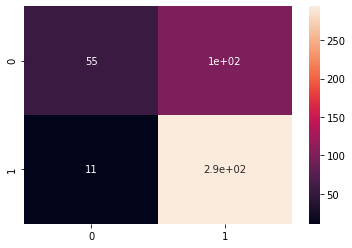

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)
plt.show()

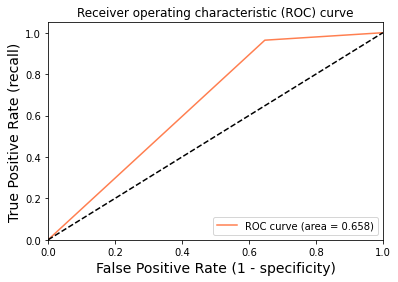

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
y_pred_proba = clf.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred1)
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

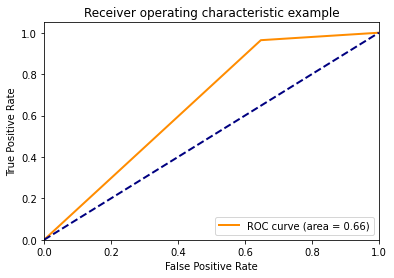

In [ ]:
fpr2, tpr2, _ = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr2, tpr2)
plt.figure()
lw = 2
plt.plot(fpr2, tpr2, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()